<a href="https://colab.research.google.com/github/YJiHun/Lecture_deeplearning_basic/blob/main/1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀 (Linear Regression)
>**목차**
1. 개념정리
2. 손실함수: 평균제곱오차 (Mean Squared Error)
3. 최적화: 경사하강법 (Gradient Descent) 
4. 실습1: 단순선형회귀분석(Simple Linear Regression Analysis)
5. 실습2: 다중선형회귀분석(Multiple Linear Regression Analysis)


In [524]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. 개념정리
---

</br>

###<center> < 가설 > </center>
###  <center>$f(x_i)=wx_i+b$</center>

</br>

### <center> < 목적 > </center>
### <center>$(w^{*}, b^{*})=arg \; min \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-f(x_i) )^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-wx_i-b)^2$</center>

### **구현**


In [525]:
def hypothesis(x, w = 1, b = 0):
  result = w * x + b
  return result

### **예제**

|공부시간|종합점수|
|------|---|
|1|1.1|
|2|1.2|
|3|2.2|
|4|3.1|
|5|3.7|

* 데이터 정의

In [526]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.1, 1.2, 2.2, 3.1, 3.7])

* 예측

In [527]:
y_pred = hypothesis(x, w = 1)
print(y_pred)

[1 2 3 4 5]


* 시각화

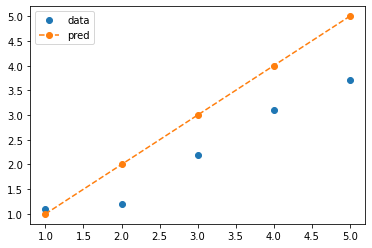

In [528]:
plt.plot(x, y, marker='o', linestyle = '')
plt.plot(x, y_pred, marker='o', linestyle = '--')
plt.legend(['data', 'pred'])
plt.show()

## 2. 손실함수: 평균제곱오차 (Mean Squred Error)
---

</br>

### <center>$ MSE = \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>

### <center>$=\sum_{i=1}^m(y_i-wx_i-b)^2$

### **구현**

In [529]:
def MSE(y, y_pred):
  l = 0
  for yi, yi_hat in zip(y, y_pred):
    l += (yi - yi_hat)**2
  return l

# def MSE(y, y_hat):
#   return sum([(yi - yi_pred)**2 for yi, yi_pred in zip(y, y_pred)])


* 계산

In [530]:
error = MSE(y, y_pred)
print(error)

3.789999999999999


### **Error 시각화**

*  W 값에 따른 Error 값 변화

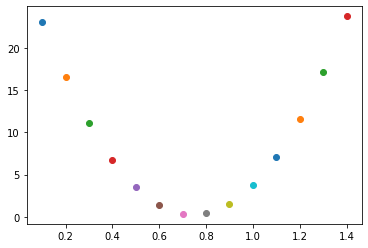

In [531]:
w_array = np.arange(0.1, 1.5, 0.1)

for w in w_array:
  y_pred = hypothesis(x, w)
  error = MSE(y, y_pred)
  plt.plot(w, error, marker = 'o')

plt.show()

## 3. 최적화: 경사하강법 ( Gradient Desent )
---
</br>

## <center>$w^* =  w-\alpha\frac{\theta }{\theta w}Cost(w) $</center>


<center> 기울기가 음수일 때: $\frac{\theta }{\theta w}Cost(w) < 0 \rightarrow w* = w+\alpha*(기울기)$</center>
<center>기울기가 음수이면 $w$는 지금보다 큰 값으로 업데이트</center>

</br>

<center> 기울기가 양수일 때: $\frac{\theta }{\theta w}Cost(w) > 0 \rightarrow w* = w-\alpha*(기울기)$</center>
<center>기울기가 양수이면 $w$는 지금보다 작은 값으로 업데이트</center>


### **구현**

In [532]:
def diff(xi, yi, w):
  return 2*(xi**2)*w-2*xi*yi
  pass

def GD(xi, yi, w, alpha = 0.01):
  return w - (alpha * diff(xi, yi, w))
  pass


### **학습**

In [533]:
xi = x[0]
yi = y[0]
w = 1
print(w)

for xi, yi in zip(x, y):
  w_new = GD(xi, yi, w)
  print(w_new)

1
1.002
0.968
0.952
0.928
0.87


### **파라미터**: $\alpha$ 값에 따른 W 변화

In [534]:
w_new = 1
print(w_new)

for xi, yi in zip(x, y):
  w_new = GD(xi, yi, w_new, alpha=0.001)
  print(w_new)

1
1.0002
0.9969984
0.9922524288
0.9853003510784
0.97303533352448


## 4. 실습1: 단순 선형 회귀 분석(Simple Linear Regression Analysis)
---

<br>

###  <center>$f(x_i)=wx_i+b$</center>



### **데이터**

|공부시간|종합점수|
|------|---|
|0|0|
|1|11|
|2|23|
|3|30|
|4|44|
|5|55|
|6|61|
|7|73|
|8|84|
|9|98|



* 데이터 정의

In [535]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([0,11,23,30,44,55,61,73,84,98])

x.shape, y.shape

((10,), (10,))

* 시각화

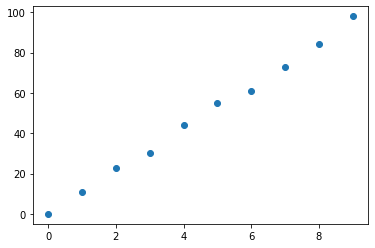

In [536]:
plt.plot(x, y, linestyle='', marker='o')

### **모델 생성**

* 케라스를 이용한 모델 구현

In [537]:
model = Sequential()

model.add(Dense(1,input_dim=1, activation='linear'))

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* 학습파라미터 확인

In [538]:
print(model.get_weights())
print('w:', model.get_weights()[0], 'b:', model.get_weights()[1])

[array([[-1.5640867]], dtype=float32), array([0.], dtype=float32)]
w: [[-1.5640867]] b: [0.]


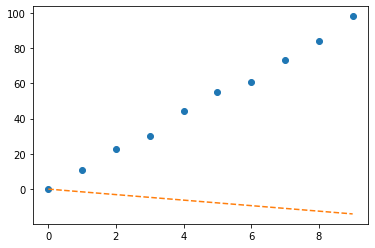

In [539]:
y_pred = model.predict(x)

plt.plot(x, y, linestyle='', marker='o')
plt.plot(x, y_pred, linestyle='--', marker='')

plt.show()

* 학습파라미터 시각화

### **학습**

* 모델 컴파일

In [540]:
model.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=0.01))

* 학습 진행

In [541]:
model.fit(x, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 255ms/step - loss: 4239.3457
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 735.3854
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 130.0250
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 25.4343
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 7.3579
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 4.2280
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 3.6805
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 3.5791
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: 3.5549
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 3.5441


### **결과**

* 학습 파라미터 확인

In [542]:
print(model.get_weights())
print('w:', model.get_weights()[0], 'b:', model.get_weights()[1])

[array([[10.338664]], dtype=float32), array([1.8055024], dtype=float32)]
w: [[10.338664]] b: [1.8055024]


* 시각화

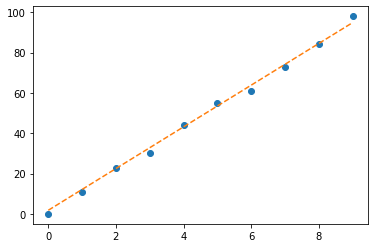

In [543]:
y_pred = model.predict(x)

plt.plot(x, y, linestyle='', marker='o')
plt.plot(x, y_pred, linestyle='--', marker='')

plt.show()

* 결과예측

In [544]:
x = [10, 11]

model.predict(x)

array([[105.19215],
       [115.53081]], dtype=float32)

## 5. 실습2: 다중선형회귀 (Multiple Linear Regression Analysis)
---
<br>

###  <center>$f(\vec{x_i})=\vec{x}_iW+b$</center>

### **데이터**
|공부시간|집중도|수면시간|종합성적|
|------|---|---|---|
|0|1|9|0|
|1|1|8.5|11|
|2|2|8|23|
|3|4|8|30|
|4|3|7|44|
|5|5|7.5|55|
|6|6|7|61|
|7|6|6|73|
|8|7|7|84|
|9|6|6.5|98|



* 데이터 정의

In [545]:
x = np.array([[0, 1, 9],
              [1, 1, 8.5],
              [2, 2, 8],
              [3, 4, 8],
              [4, 3, 7],
              [5, 5, 7.5],
              [6, 6, 7],
              [7, 6, 6],
              [8, 7, 7],
              [9, 6, 6.5]])

y = np.array([0, 11, 23, 30, 44, 55, 61, 73, 84, 98])

### **모델 생성**

* 케라스를 이용한 모델 생성

In [546]:
model = Sequential()

model.add(Dense(1,input_dim=3, activation='linear'))

model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [547]:
print(model.get_weights())
print('w:', model.get_weights()[0], 'b:', model.get_weights()[1])

[array([[-1.0046616 ],
       [ 1.0784129 ],
       [-0.41425294]], dtype=float32), array([0.], dtype=float32)]
w: [[-1.0046616 ]
 [ 1.0784129 ]
 [-0.41425294]] b: [0.]


### **학습**

* 모델 컴파일

In [548]:
model.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=0.01))

* 학습 진행

In [549]:
model.fit(x, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 287ms/step - loss: 3564.2981
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 2991.4387
Epoch 3/10
1/1 [==============================] - 0s 7ms/step - loss: 2532.1018
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 2157.5129
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 1847.7383
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 1588.6711
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 1370.0901
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 1184.4067
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 1025.8474
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 889.9170


### **결과**

* 학습 파라미터 확인

In [550]:
print(model.get_weights())
print('w:', model.get_weights()[0], 'b:', model.get_weights()[1])

[array([[ 4.470912 ],
       [ 4.2312503],
       [-2.1470296]], dtype=float32), array([-0.01786539], dtype=float32)]
w: [[ 4.470912 ]
 [ 4.2312503]
 [-2.1470296]] b: [-0.01786539]


* 결과 예측

In [551]:
x = [[5, 4, 6]]

print(model.predict(x))

[[26.37952]]
